In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# File with the data
file = 'times.csv'

# Mounting data frame
cols = ['cores', 'problem_size', 'timing']
data = pd.read_csv(file, names=cols)
df = pd.DataFrame(data, columns=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cores         36 non-null     int64  
 1   problem_size  36 non-null     int64  
 2   timing        36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 992.0 bytes


a=8.693013363963183e-09, b=0.0008339997124555158


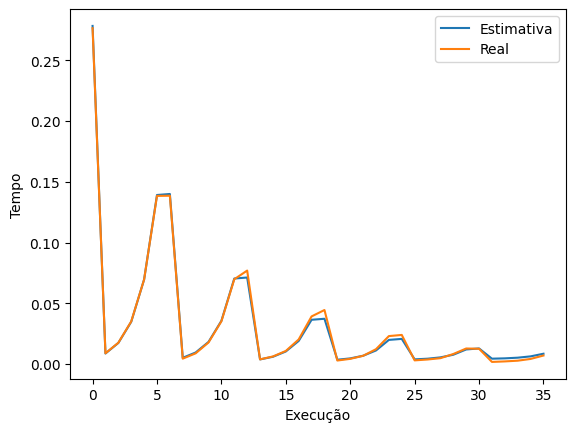

In [2]:
"""
Time parallel function
"""
def tp(X, a, b):
    p, n = X
    return a*n/p + b*np.log2(p)

# Arrays
problem_sizes = np.array(df['problem_size'])
cores = np.array(df['cores'])
timings = np.array(df['timing'])

# Finding coefficients
y = timings
X = (cores, problem_sizes)
popt, pcov = curve_fit(tp, X, y)
a, b = popt
print("a={}, b={}".format(a, b))

# Testing
estimatives = []
errors = []

for index, row in df.iterrows():
    e = tp([row['cores'], row['problem_size']], a, b)
    estimatives.append(e)
    errors.append(100.0 * abs(e - row['timing'])/row['timing'])

# Estimative column by the function
df['estimative'] = estimatives

# Error column
df['error'] = errors

# Plot real and estimative
fig = plt.figure()
df['estimative'].plot(label='Estimativa')
df['timing'].plot(label='Real')
plt.ylabel('Tempo')
plt.xlabel('Execução')
plt.legend(loc='upper right')

In [7]:
df['error'].min()

np.float64(0.04224753432632687)

In [8]:
df

,cores,problem_size,timing,estimative,error
0,1,32000000,0.276313,0.278176,0.674390
1,1,1000000,0.008895,0.008693,2.270788
2,1,2000000,0.017548,0.017386,0.920207
3,1,4000000,0.035062,0.034772,0.828368
4,1,8000000,0.069573,0.069544,0.042248
5,1,16000000,0.138338,0.139088,0.542668
6,2,32000000,0.138497,0.139922,1.028693
7,2,1000000,0.004462,0.005181,16.115799
8,2,2000000,0.008830,0.009527,7.887584
9,2,4000000,0.017783,0.018220,2.457552
